# WindFarmer web API / BlockageCorrection demo
The WindFarmer API is a web API. You can call it from any coding language, or use tools like Postman. 

There is an OpenAPI definition which provides
documentation, and allows client code to be generated.

From python you can call the API directly, using `urllib3` or `requests`, or you can use the generated library.


## Import packages
First, import the necessary modules

In [1]:
import requests
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

## Get URL and API key
To access the API you need a authorization token. This should be kept secure - and not added to source control, so I'm getting it from an environment variable.

The token should be passed as an Authorization header. We also need to set the `Content-Type` to let the API know that we're sending JSON data.

In [2]:
api_url = 'https://windfarmer.dnv.com/api/v2/'
auth_token = os.environ['WINDFARMER_ACCESS_KEY']

headers = {
    'Authorization': f'Bearer {auth_token}',
    'Content-Type': 'application/json'
}

## User inputs
In this example, we load data from files that match 2 files accepted by the blockage web app:
* The power curve, thrust curve, and frequency distribution
* The layout

In [3]:
pc_filename = "./input/BlockageWebAppInputs/PowerCurve.txt"
layout_filename = "./input/BlockageWebAppInputs/Layout.txt"
significant_atmospheric_stability = True

## Show layout and power curve

Here we parse the tab-separated input files and show the data for visual checking.

In [4]:
pc_df = pd.read_csv(pc_filename, sep='\t')
print("The power curve, thrust curve, and frequency distribution")
display(pc_df)

turbines_df = pd.read_csv(layout_filename, sep='\t')
print("Layout")
display(turbines_df)



The power curve, thrust curve, and frequency distribution


,windSpeed_m_per_s,powerOutput_kW,thrustCoefficient,frequency_pc
0,0,0.00000,0.00,0.00236
1,1,0.00000,0.00,0.02084
2,2,0.00000,0.10,0.03777
3,3,2.43271,0.65,0.05662
4,4,35.57645,0.97,0.07879
5,5,119.22456,0.99,0.09794
6,6,243.18181,0.95,0.10999
7,7,396.19832,0.90,0.11194
8,8,582.60062,0.85,0.10629
9,9,872.01490,0.78,0.09732


Layout


,easting_m,northing_m,hubHeight_m,rotorDiameter_m
0,199977,2242510,100,80
1,200556,2242405,100,80
2,199398,2242615,100,80
3,199548,2242300,100,80
4,200127,2242195,100,80
5,200706,2242090,100,80
6,200407,2242721,100,80
7,199828,2242826,100,80
8,200257,2243036,100,80


Map of layout colored by hub height, with dots sized by rotor diameter (not to scale):


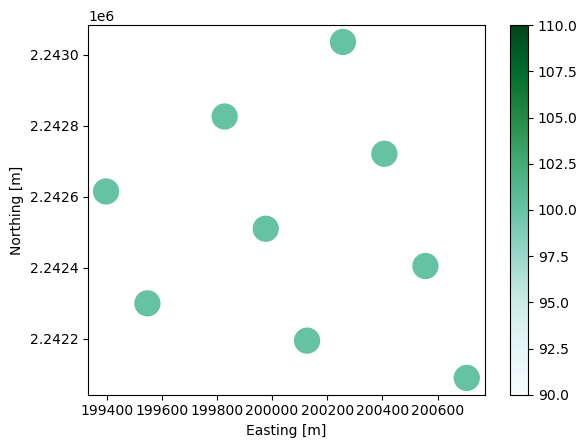

In [5]:
print("Map of layout colored by hub height, with dots sized by rotor diameter (not to scale):")
plt.scatter(turbines_df['easting_m'], turbines_df['northing_m'], 
            c=turbines_df['hubHeight_m'], s=turbines_df['rotorDiameter_m'] * 4, cmap='BuGn');
plt.colorbar();
plt.xlabel("Easting [m]");
plt.ylabel("Northing [m]");

Power curve used in calculation:


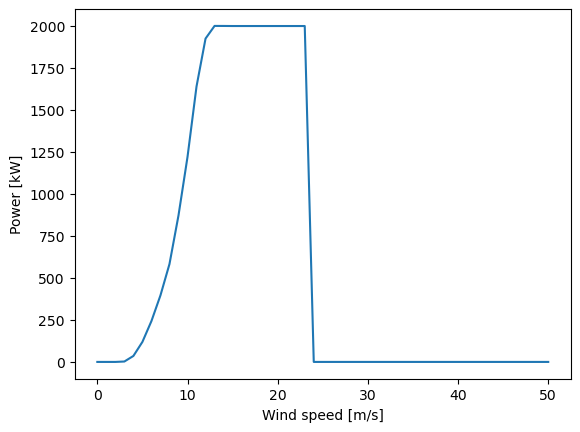

In [6]:
print("Power curve used in calculation:")
plt.plot(pc_df['windSpeed_m_per_s'], pc_df['powerOutput_kW']);
plt.xlabel("Wind speed [m/s]")
plt.ylabel("Power [kW]");

Thrust curve used in calculation:


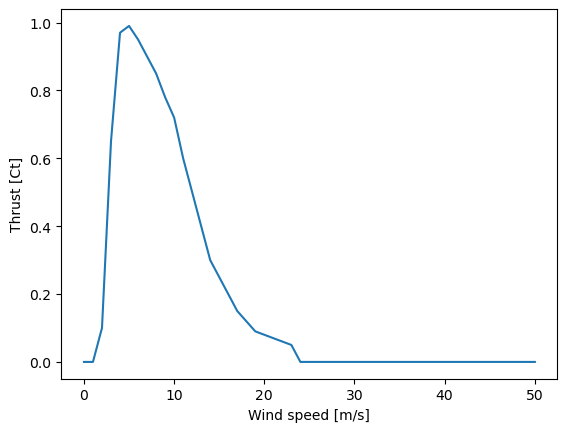

In [7]:
print("Thrust curve used in calculation:")
plt.plot(pc_df['windSpeed_m_per_s'], pc_df['thrustCoefficient']);
plt.xlabel("Wind speed [m/s]")
plt.ylabel("Thrust [Ct]");

Frequency distribution used in calculation:


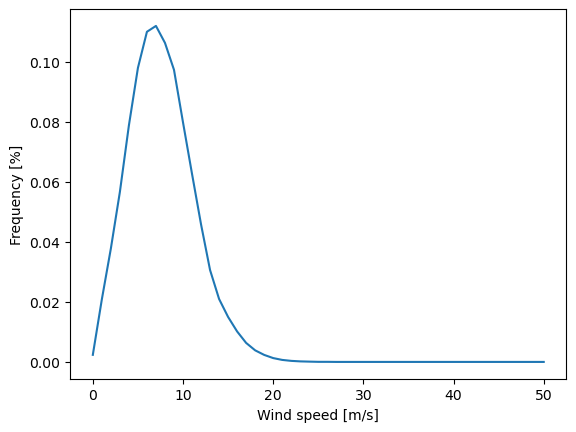

In [8]:
print("Frequency distribution used in calculation:")
plt.plot(pc_df['windSpeed_m_per_s'], pc_df['frequency_pc']);
plt.xlabel("Wind speed [m/s]")
plt.ylabel("Frequency [%]");

## Convert DataFrames to lists for API
The json input to the API can be built very simply from data frames.
The data structure needed to serialise to json is formed of dictionaries and lists.

In [9]:
pc_dict_list = []
for index, row in pc_df.iterrows():
    pc_dict_list.append(row.to_dict())
pc_dict_list[0:3]

[{'windSpeed_m_per_s': 0.0,
  'powerOutput_kW': 0.0,
  'thrustCoefficient': 0.0,
  'frequency_pc': 0.00236},
 {'windSpeed_m_per_s': 1.0,
  'powerOutput_kW': 0.0,
  'thrustCoefficient': 0.0,
  'frequency_pc': 0.02084},
 {'windSpeed_m_per_s': 2.0,
  'powerOutput_kW': 0.0,
  'thrustCoefficient': 0.1,
  'frequency_pc': 0.03777}]

In [10]:
turbines_dict_list = []
for index, row in turbines_df.iterrows():
    turbines_dict_list.append(row.to_dict())
turbines_dict_list[0:3]

[{'easting_m': 199977,
  'northing_m': 2242510,
  'hubHeight_m': 100,
  'rotorDiameter_m': 80},
 {'easting_m': 200556,
  'northing_m': 2242405,
  'hubHeight_m': 100,
  'rotorDiameter_m': 80},
 {'easting_m': 199398,
  'northing_m': 2242615,
  'hubHeight_m': 100,
  'rotorDiameter_m': 80}]

## Calculate blockage

In [11]:
input = {"turbines": turbines_dict_list,
         "turbinePerformance": pc_dict_list,
         "significantAtmosphericStability": significant_atmospheric_stability}

response = requests.post(
    api_url + 'BlockageCorrection', 
    headers=headers,
    json = input)

result = json.loads(response.content)
blockage_correction = float(result['blockageEffect']) *100

print(f"blockage correction = {blockage_correction:.3f} %")

blockage correction = 98.835 %
